In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re
from correlation import save_corrlation_matrix,save_scatter

In [2]:
out_folder = "output_figures"

In [3]:
df_raw = pd.read_csv('../data/merged-logs_repo.csv')

In [4]:
df_binary = df_raw[df_raw['is_source']!=True]

In [5]:
df_binary_red = df_binary[~df_binary.isnull().all(axis=1)]
df_binary_red.shape[0]

366

In [31]:
df_binary_red = df_binary_red[[a for a in df_binary_red.columns if 'Unnamed' not in a]]

#### Binary code analysis metrics to perfromance metrics corrlation matrix 

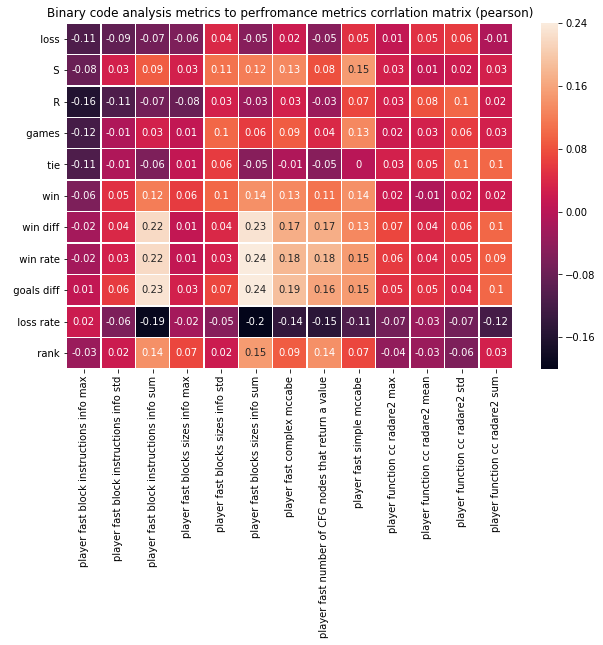

In [32]:
corr_pearson = save_corrlation_matrix('Binary',df_binary_red,'pearson','player(.)*','results',
                                      out_folder,x_axis_title_size=0.40,figsize=(10,10))

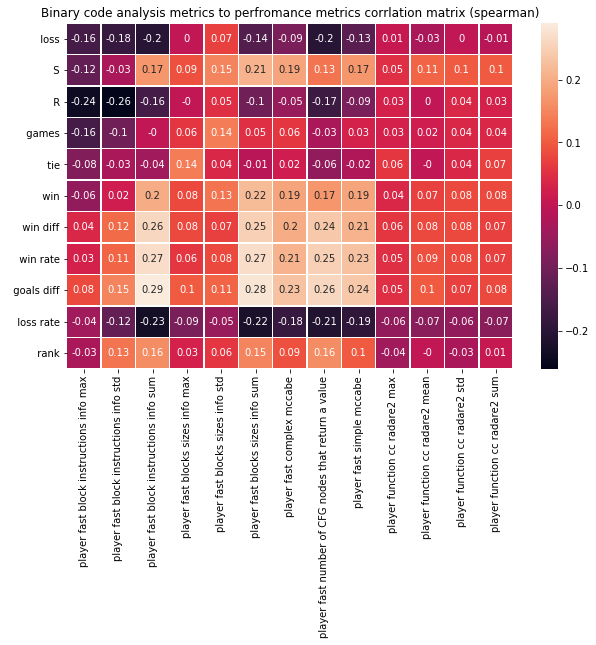

In [33]:
corr_spearman = save_corrlation_matrix('Binary', df_binary_red,'spearman','player(.)*','results',out_folder,
                                      x_axis_title_size=0.40,figsize=(10,10))

In [8]:
melt_corr= corr_pearson.reset_index().melt(id_vars=['index'])
melt_corr= melt_corr[melt_corr['value'].abs()>0.2]

In [12]:
melt_corr

,index,variable,value
2,player_fast_block_instructions_info_sum,results_Unnamed: 0,0.215637
5,player_fast_blocks_sizes_info_sum,results_Unnamed: 0,0.226970
93,player_fast_block_instructions_info_sum,results_win_diff,0.216310
96,player_fast_blocks_sizes_info_sum,results_win_diff,0.226765
106,player_fast_block_instructions_info_sum,results_win_rate,0.224155
109,player_fast_blocks_sizes_info_sum,results_win_rate,0.237784
119,player_fast_block_instructions_info_sum,results_goals_diff,0.229215
122,player_fast_blocks_sizes_info_sum,results_goals_diff,0.243121
135,player_fast_blocks_sizes_info_sum,results_loss_rate,-0.201190


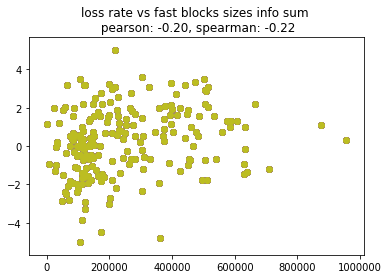

In [14]:
for index, row in melt_corr.iterrows():
    save_scatter(df_binary_red,row['index'],row['variable'],out_folder)

## Code repositories

In [26]:
df_code = df_raw[df_raw['is_source']==True]

In [27]:
df_code = df_code[[a for a in df_code.columns if 'Unnamed' not in a]]

44

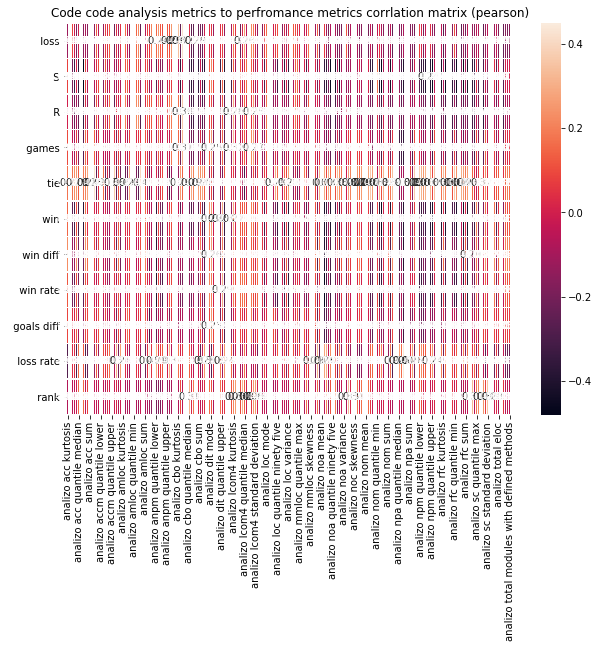

In [37]:
corr_pearson = save_corrlation_matrix('Code', df_code,'pearson','analizo(.)*','results',
                                      out_folder,x_axis_title_size=0.20,figsize=(10,8))

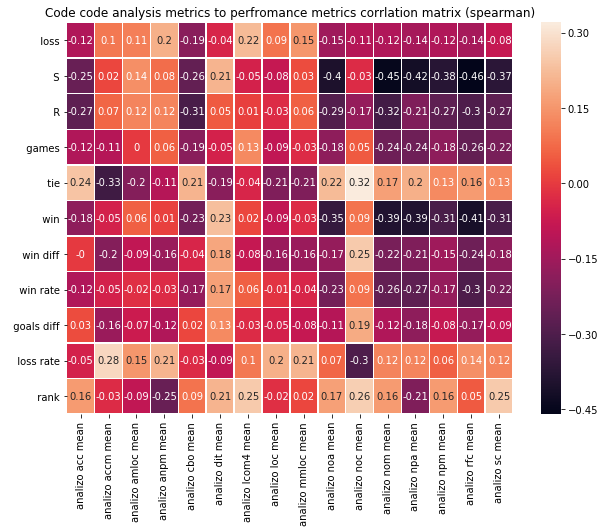

In [30]:
corr_pearson = save_corrlation_matrix('Code', df_code,'spearman','analizo(.)*mean','results',
                                       out_folder,x_axis_title_size=0.20,figsize=(10,8))

In [47]:
melt_corr= corr_pearson.reset_index().melt(id_vars=['index'])
melt_corr= melt_corr[melt_corr['value'].abs()>0.35]

In [52]:
list(melt_corr['variable'].unique())

['results_loss',
 'results_S',
 'results_R',
 'results_games',
 'results_tie',
 'results_win',
 'results_win_diff',
 'results_win_rate',
 'results_loss_rate',
 'results_rank']

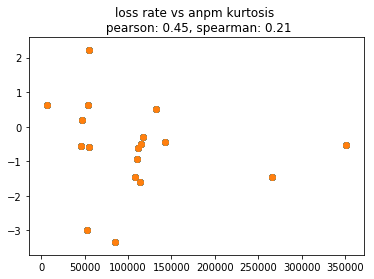

In [46]:
for index, row in melt_corr.iterrows():
    save_scatter(df_code,row['index'],row['variable'],out_folder)